# Exploratory Data Analysis 

Using the two datasets product of the notebook data_prep.ipynb, this notebook has the goal to make the corresponding EDA for both datasets. 
The idea is to further understand the data, find relations between the variables, and see if every assumption can be fulfilled to make further analysis and predictions.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

## Players Dataset

In [32]:
players_df= pd.read_csv('~/pricing-fifa/data/players.csv')
players_df.describe()

value_eur     overall        pace    shooting     passing  \
count     16242.00000 16242.00000 16242.00000 16242.00000 16242.00000   
mean    2578808.02857    66.42655    67.70090    52.29830    57.23378   
std     5650533.73929     6.84229    11.29766    14.02942    10.40784   
min           0.00000    48.00000    24.00000    15.00000    24.00000   
25%      350000.00000    62.00000    61.00000    42.00000    50.00000   
50%      750000.00000    66.00000    69.00000    54.00000    58.00000   
75%     2300000.00000    71.00000    75.00000    63.00000    64.00000   
max   105500000.00000    94.00000    96.00000    93.00000    92.00000   

        dribbling   defending      physic  
count 16242.00000 16242.00000 16242.00000  
mean     62.53158    51.55350    64.87668  
std      10.28495    16.41953     9.76016  
min      23.00000    15.00000    27.00000  
25%      57.00000    36.00000    59.00000  
50%      64.00000    56.00000    66.00000  
75%      69.00000    65.00000    72.00000  
max      96.00000    90.00000    90.00000

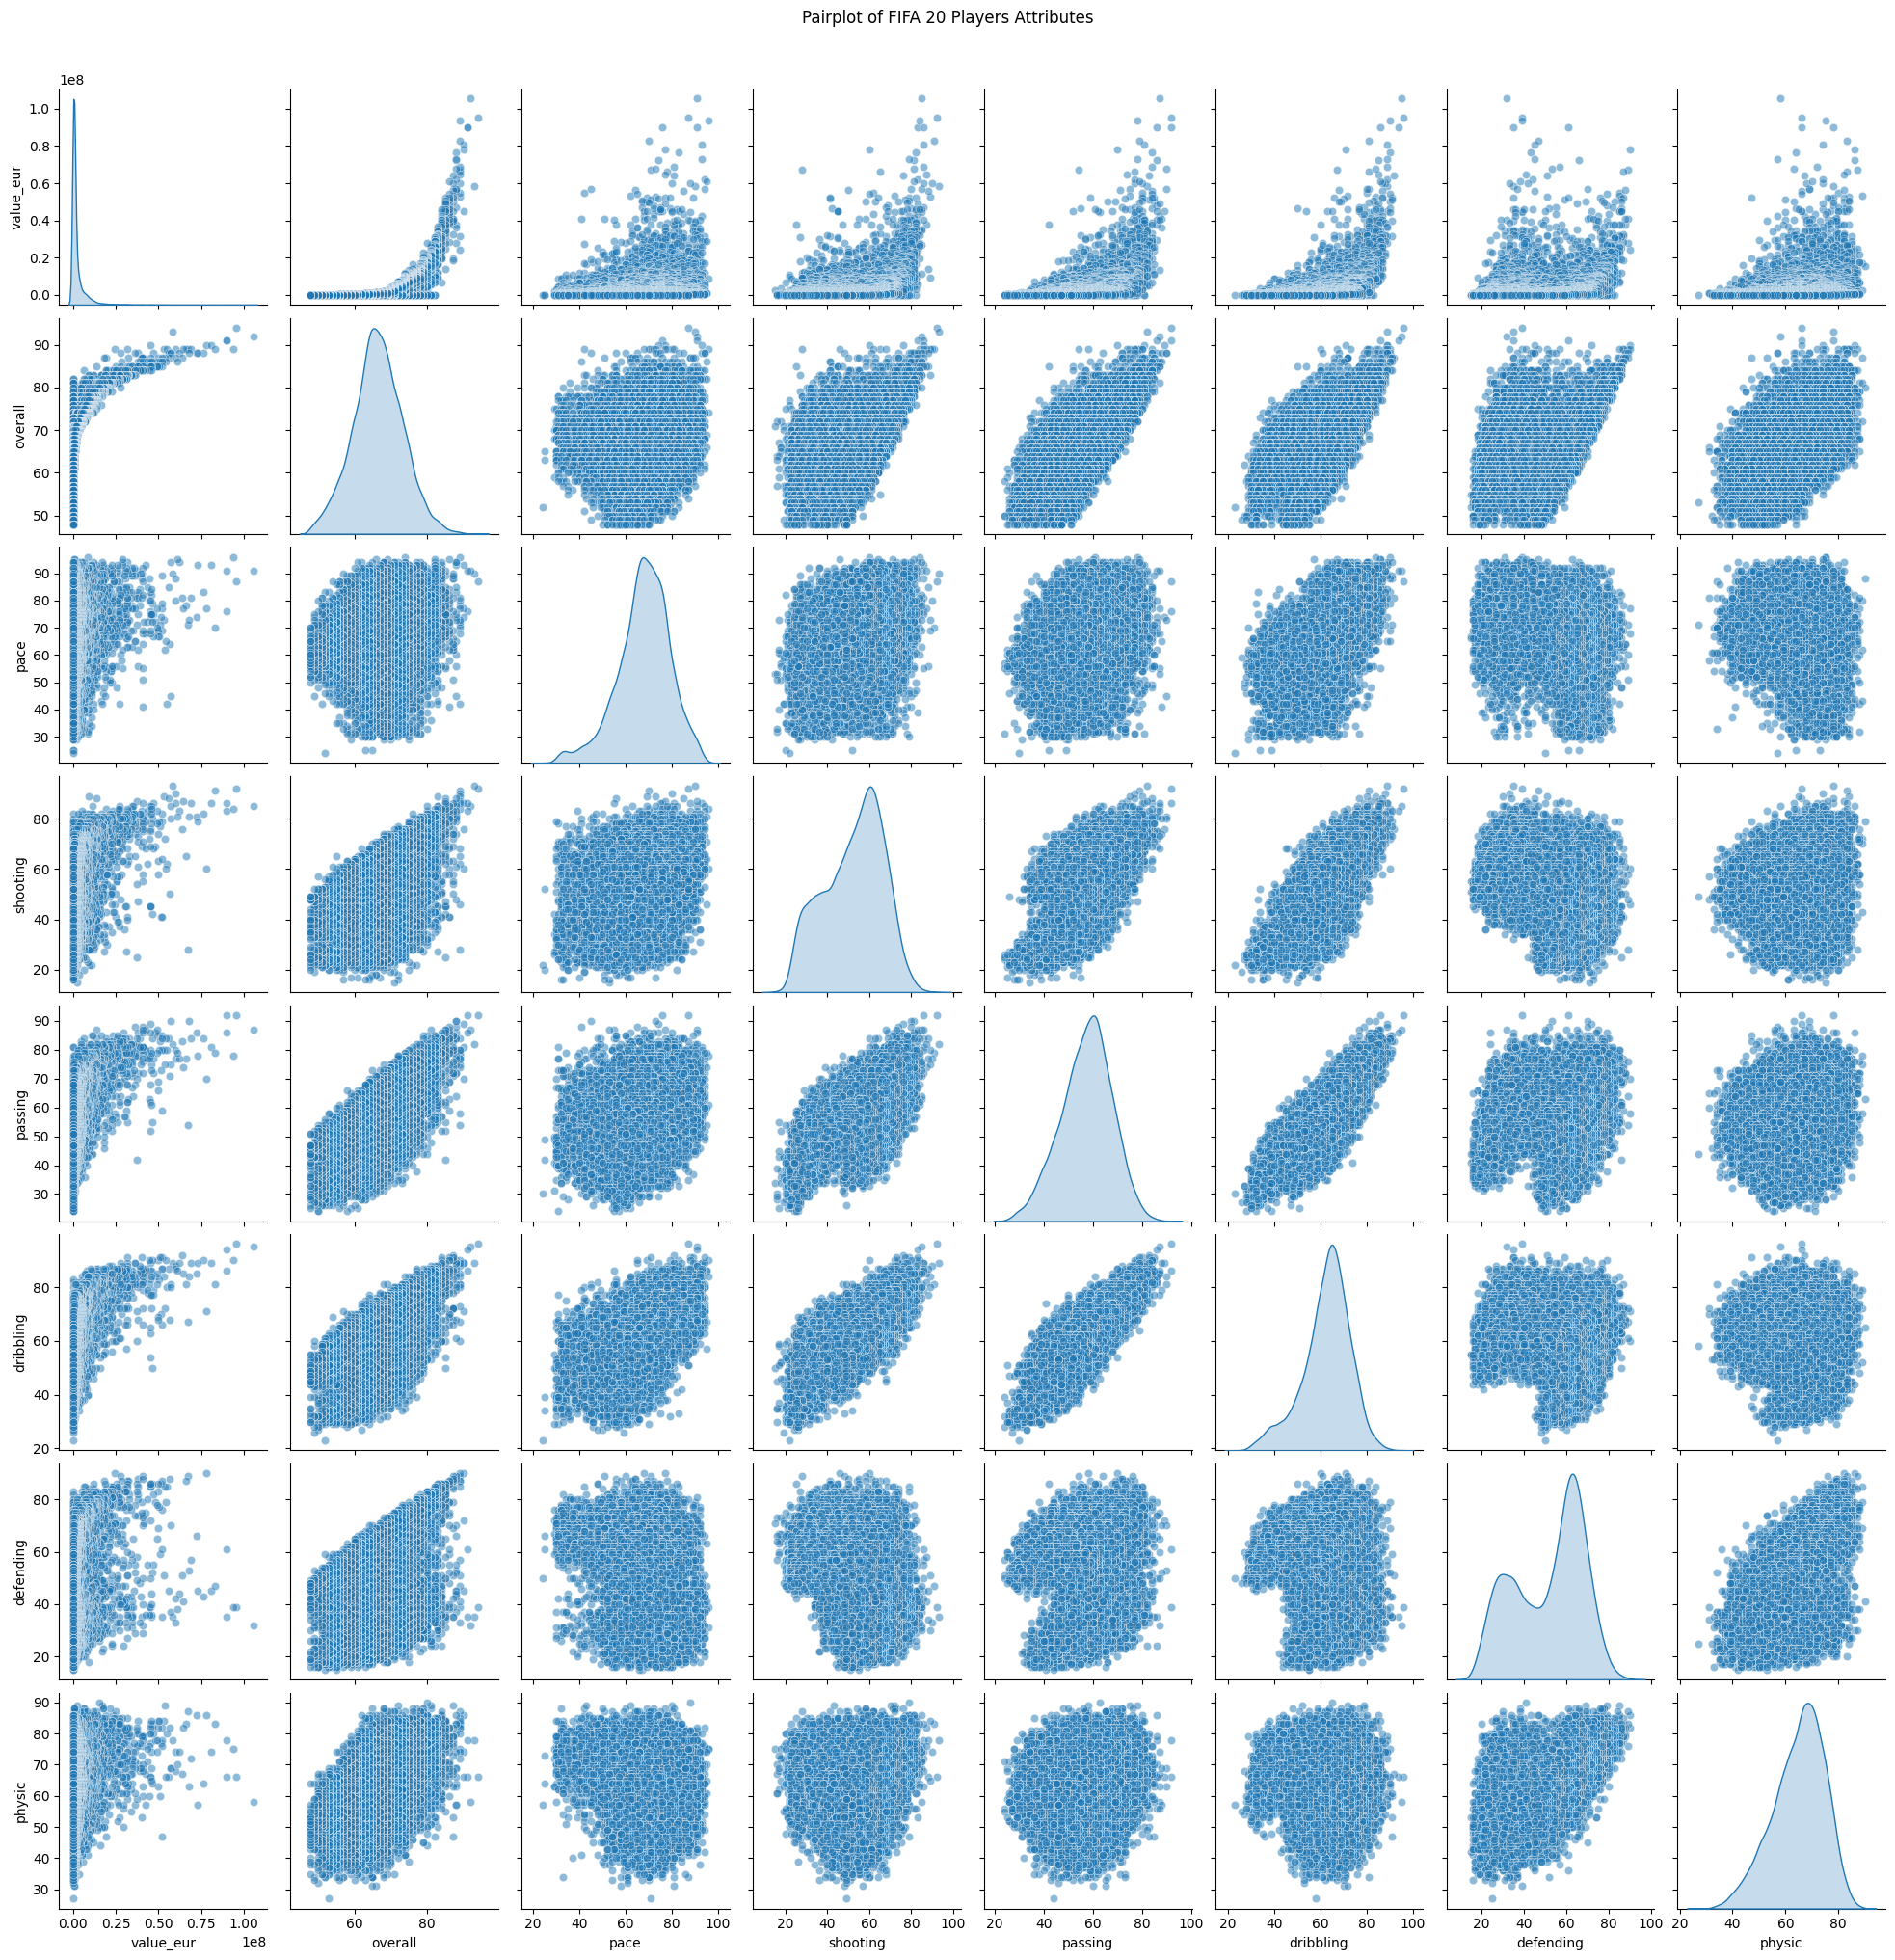

In [33]:
#Plotting the pairplot 
sns.pairplot(players_df[numeric_cols], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of FIFA 20 Players Attributes', y=1.02)
plt.show()

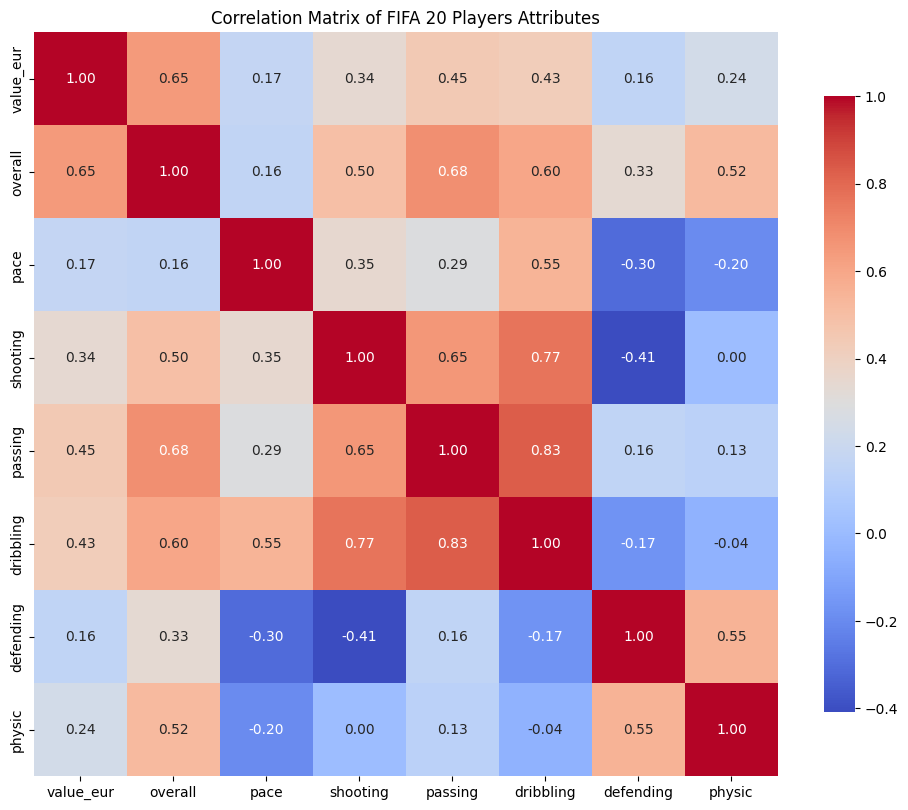

In [34]:
#Correlation matrix and visualization
# Select only numeric columns for correlation
players_numeric_cols = players_df.select_dtypes(include=[np.number]).columns.tolist()
corr = players_df[players_numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of FIFA 20 Players Attributes')
plt.show()

In [54]:
#Creating 7 groups with their nationality. The nationalities with their respective groupes are:
#Argentina, England, Brasil, France, Spain, Portugal. We will group the rest of the nationalities in the group "Other"
players_df['nationality_group'] = players_df['nationality'].apply(lambda x: 
                                                'Argentina' if x == 'Argentina' else
                                                'England' if x == 'England' else
                                                'Brasil' if x == 'Brazil' else
                                                'France' if x == 'France' else
                                                'Spain' if x == 'Spain' else
                                                'Portugal' if x == 'Portugal' else
                                                'Belgium' if x == 'Belgium' else
                                                'Germany' if x == 'Germany' else
                                                'Other')
players_df.head(10)

short_name  value_eur  overall player_positions     pace  shooting  \
0           L. Messi   95500000       94               RW 87.00000  92.00000   
1  Cristiano Ronaldo   58500000       93               ST 90.00000  93.00000   
2          Neymar Jr  105500000       92               LW 91.00000  85.00000   
3          E. Hazard   90000000       91               LW 91.00000  83.00000   
4       K. De Bruyne   90000000       91              CAM 76.00000  86.00000   
5        V. van Dijk   78000000       90               CB 77.00000  60.00000   
6          L. Modrić   45000000       90               CM 74.00000  76.00000   
7           M. Salah   80500000       90               RW 93.00000  86.00000   
8          K. Mbappé   93500000       89               ST 96.00000  84.00000   
9       K. Koulibaly   67500000       89               CB 71.00000  28.00000   

   passing  dribbling  defending   physic  nationality nationality_group  
0 92.00000   96.00000   39.00000 66.00000    Argentina         Argentina  
1 82.00000   89.00000   35.00000 78.00000     Portugal          Portugal  
2 87.00000   95.00000   32.00000 58.00000       Brazil            Brasil  
3 86.00000   94.00000   35.00000 66.00000      Belgium           Belgium  
4 92.00000   86.00000   61.00000 78.00000      Belgium           Belgium  
5 70.00000   71.00000   90.00000 86.00000  Netherlands             Other  
6 89.00000   89.00000   72.00000 66.00000      Croatia             Other  
7 81.00000   89.00000   45.00000 74.00000        Egypt             Other  
8 78.00000   90.00000   39.00000 75.00000       France            France  
9 54.00000   67.00000   89.00000 87.00000      Senegal             Other

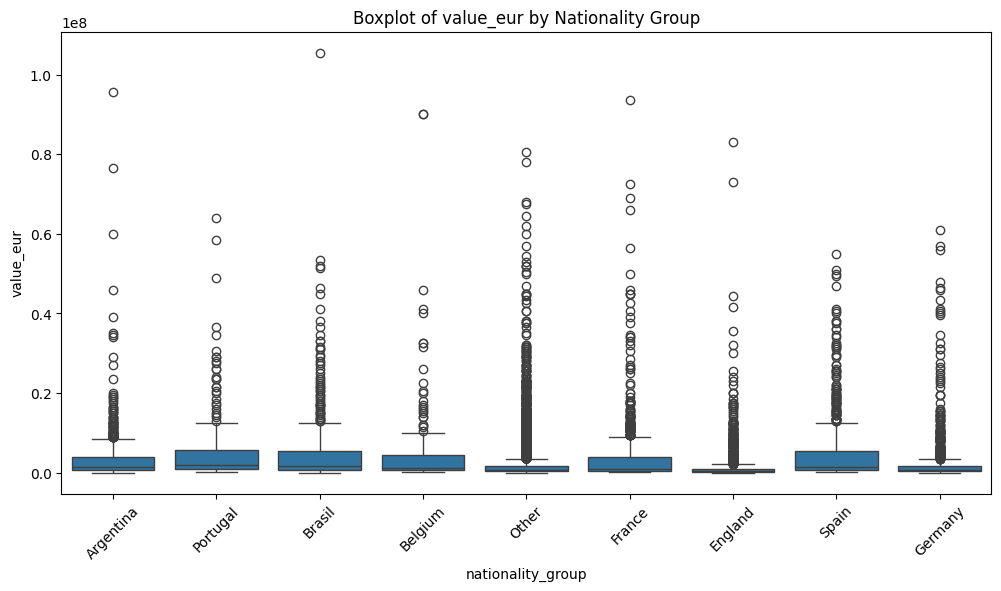

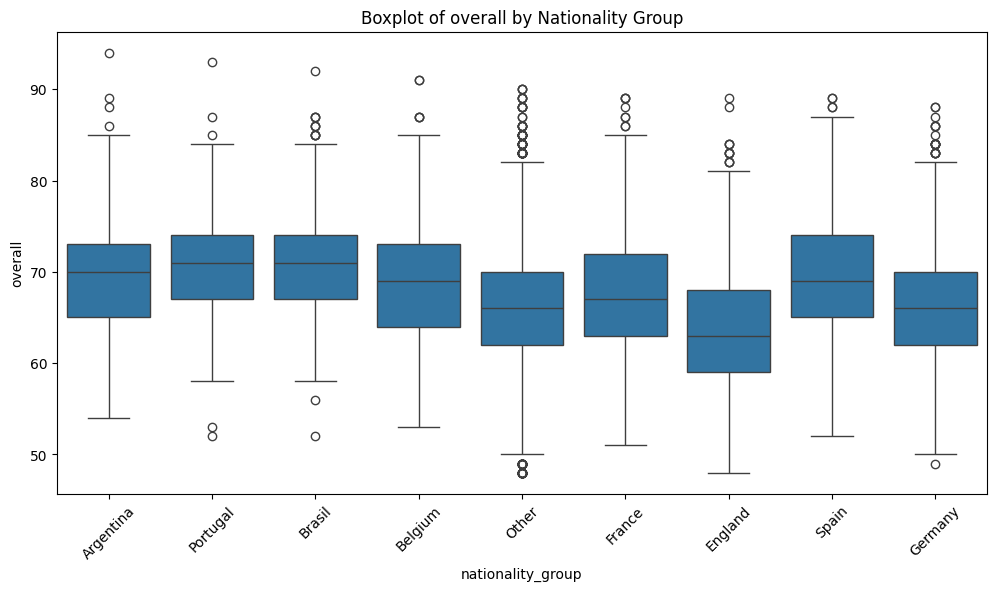

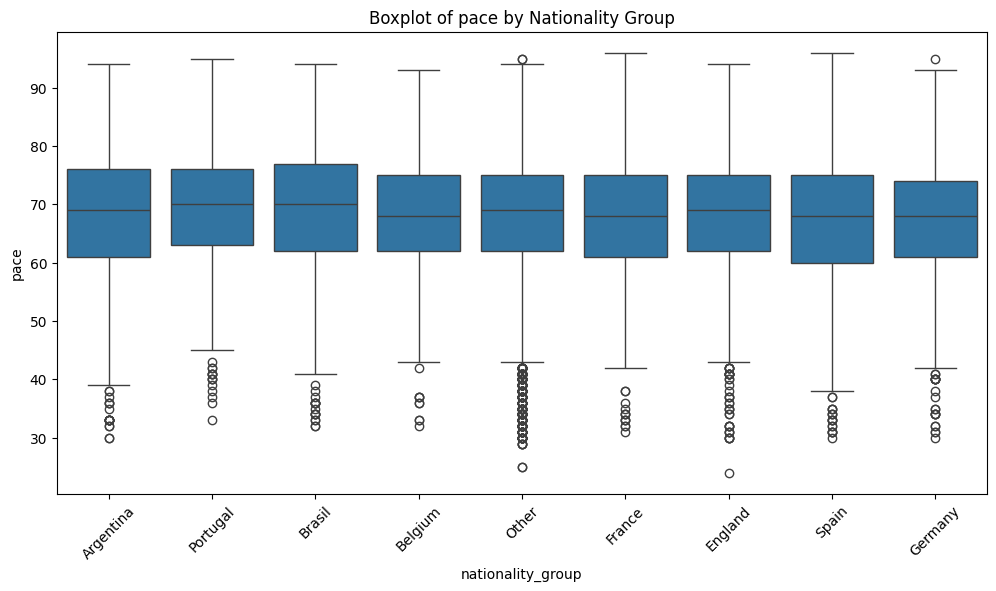

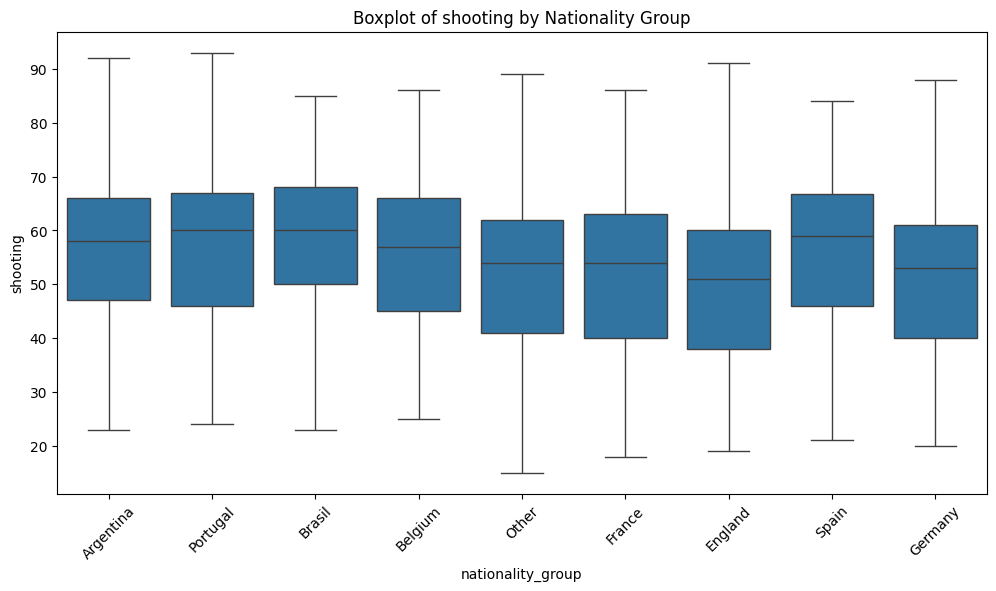

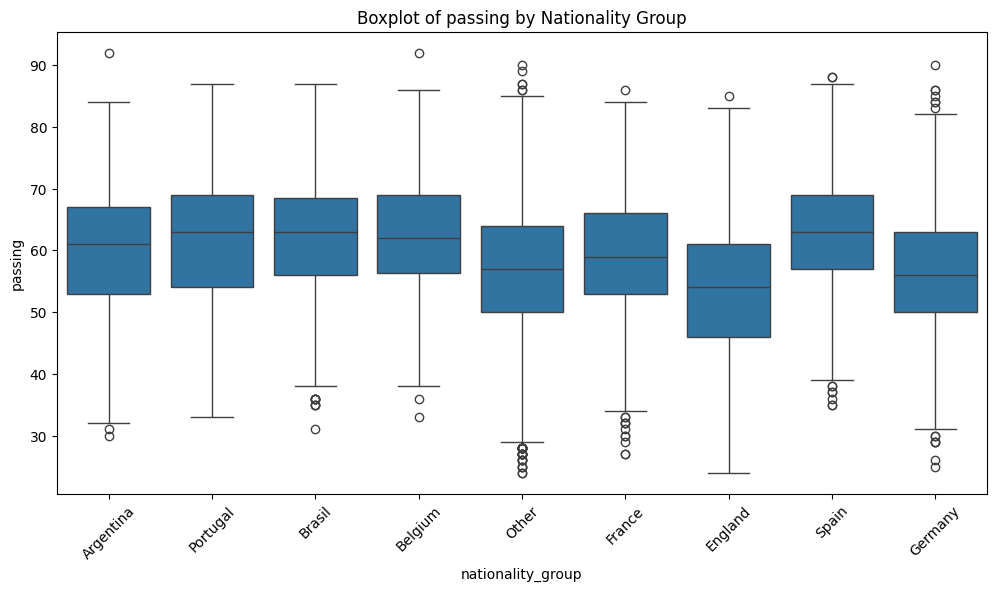

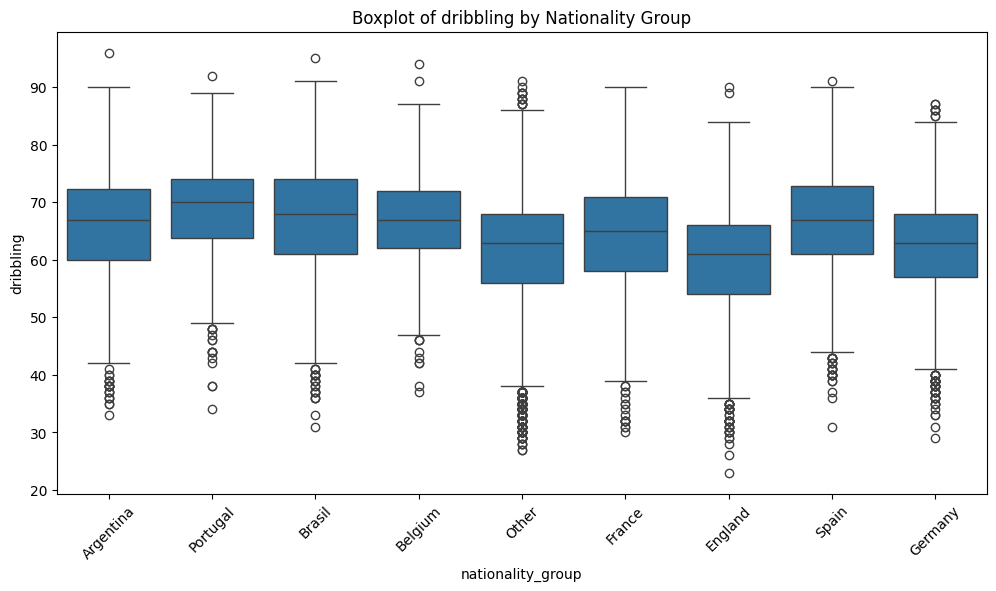

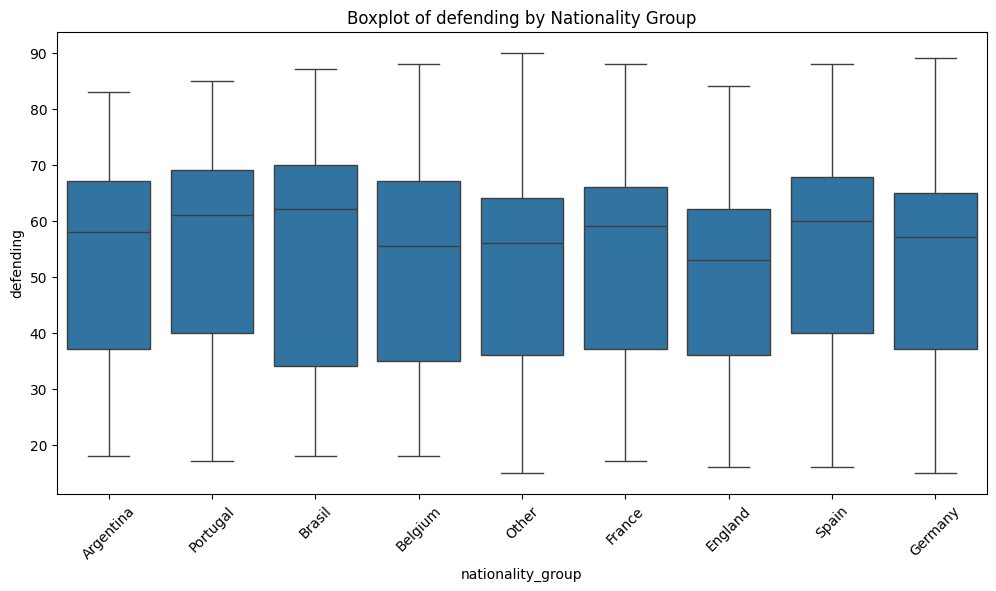

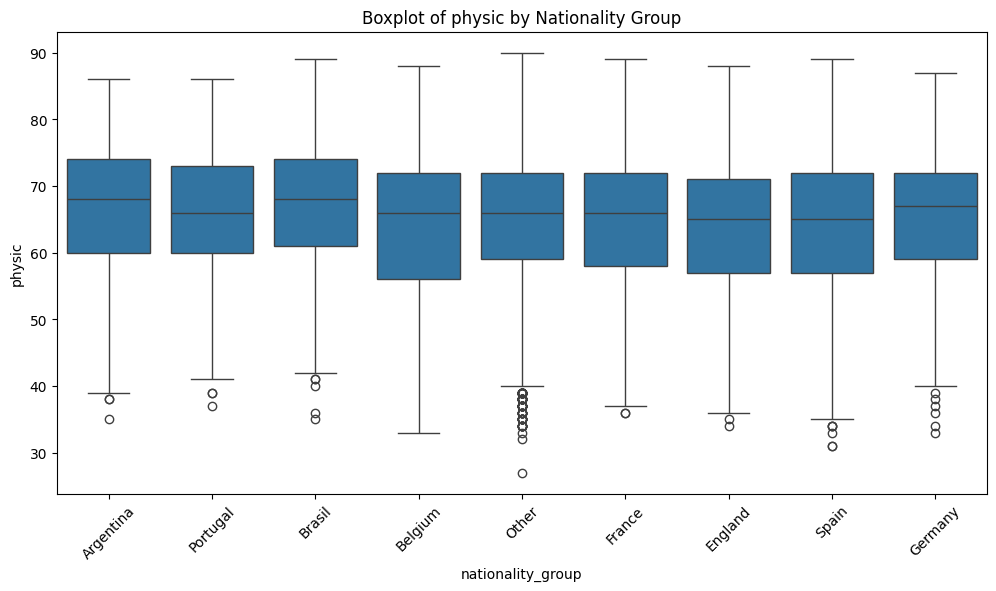

In [55]:
#Check groups statistics with a boxplot
for var in players_numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='nationality_group', y=f'{var}', data=players_df)
    plt.title(f'Boxplot of {var} by Nationality Group')
    plt.xticks(rotation=45)
    plt.show()

## Goalkeepers dataset

In [45]:
goalies_df = pd.read_csv('~/pricing-fifa/data/goalkeepers.csv')
goalies_df.describe()

value_eur    overall  gk_diving  gk_handling  gk_kicking  \
count     2036.00000 2036.00000 2036.00000   2036.00000  2036.00000   
mean   1728015.71709   64.79666   65.42240     63.14637    61.83251   
std    4973523.97491    7.60363    7.73628      7.24402     7.51071   
min          0.00000   48.00000   44.00000     42.00000    35.00000   
25%     140000.00000   60.00000   60.00000     58.00000    57.00000   
50%     400000.00000   65.00000   65.00000     63.00000    61.00000   
75%     975000.00000   70.00000   70.00000     68.00000    66.00000   
max   77500000.00000   91.00000   90.00000     92.00000    93.00000   

       gk_reflexes   gk_speed  gk_positioning  
count   2036.00000 2036.00000      2036.00000  
mean      66.39047   37.79862        63.37475  
std        8.15406   10.63404         8.44788  
min       45.00000   12.00000        41.00000  
25%       60.75000   29.00000        58.00000  
50%       66.00000   39.00000        64.00000  
75%       72.00000   46.00000        69.00000  
max       92.00000   65.00000        91.00000

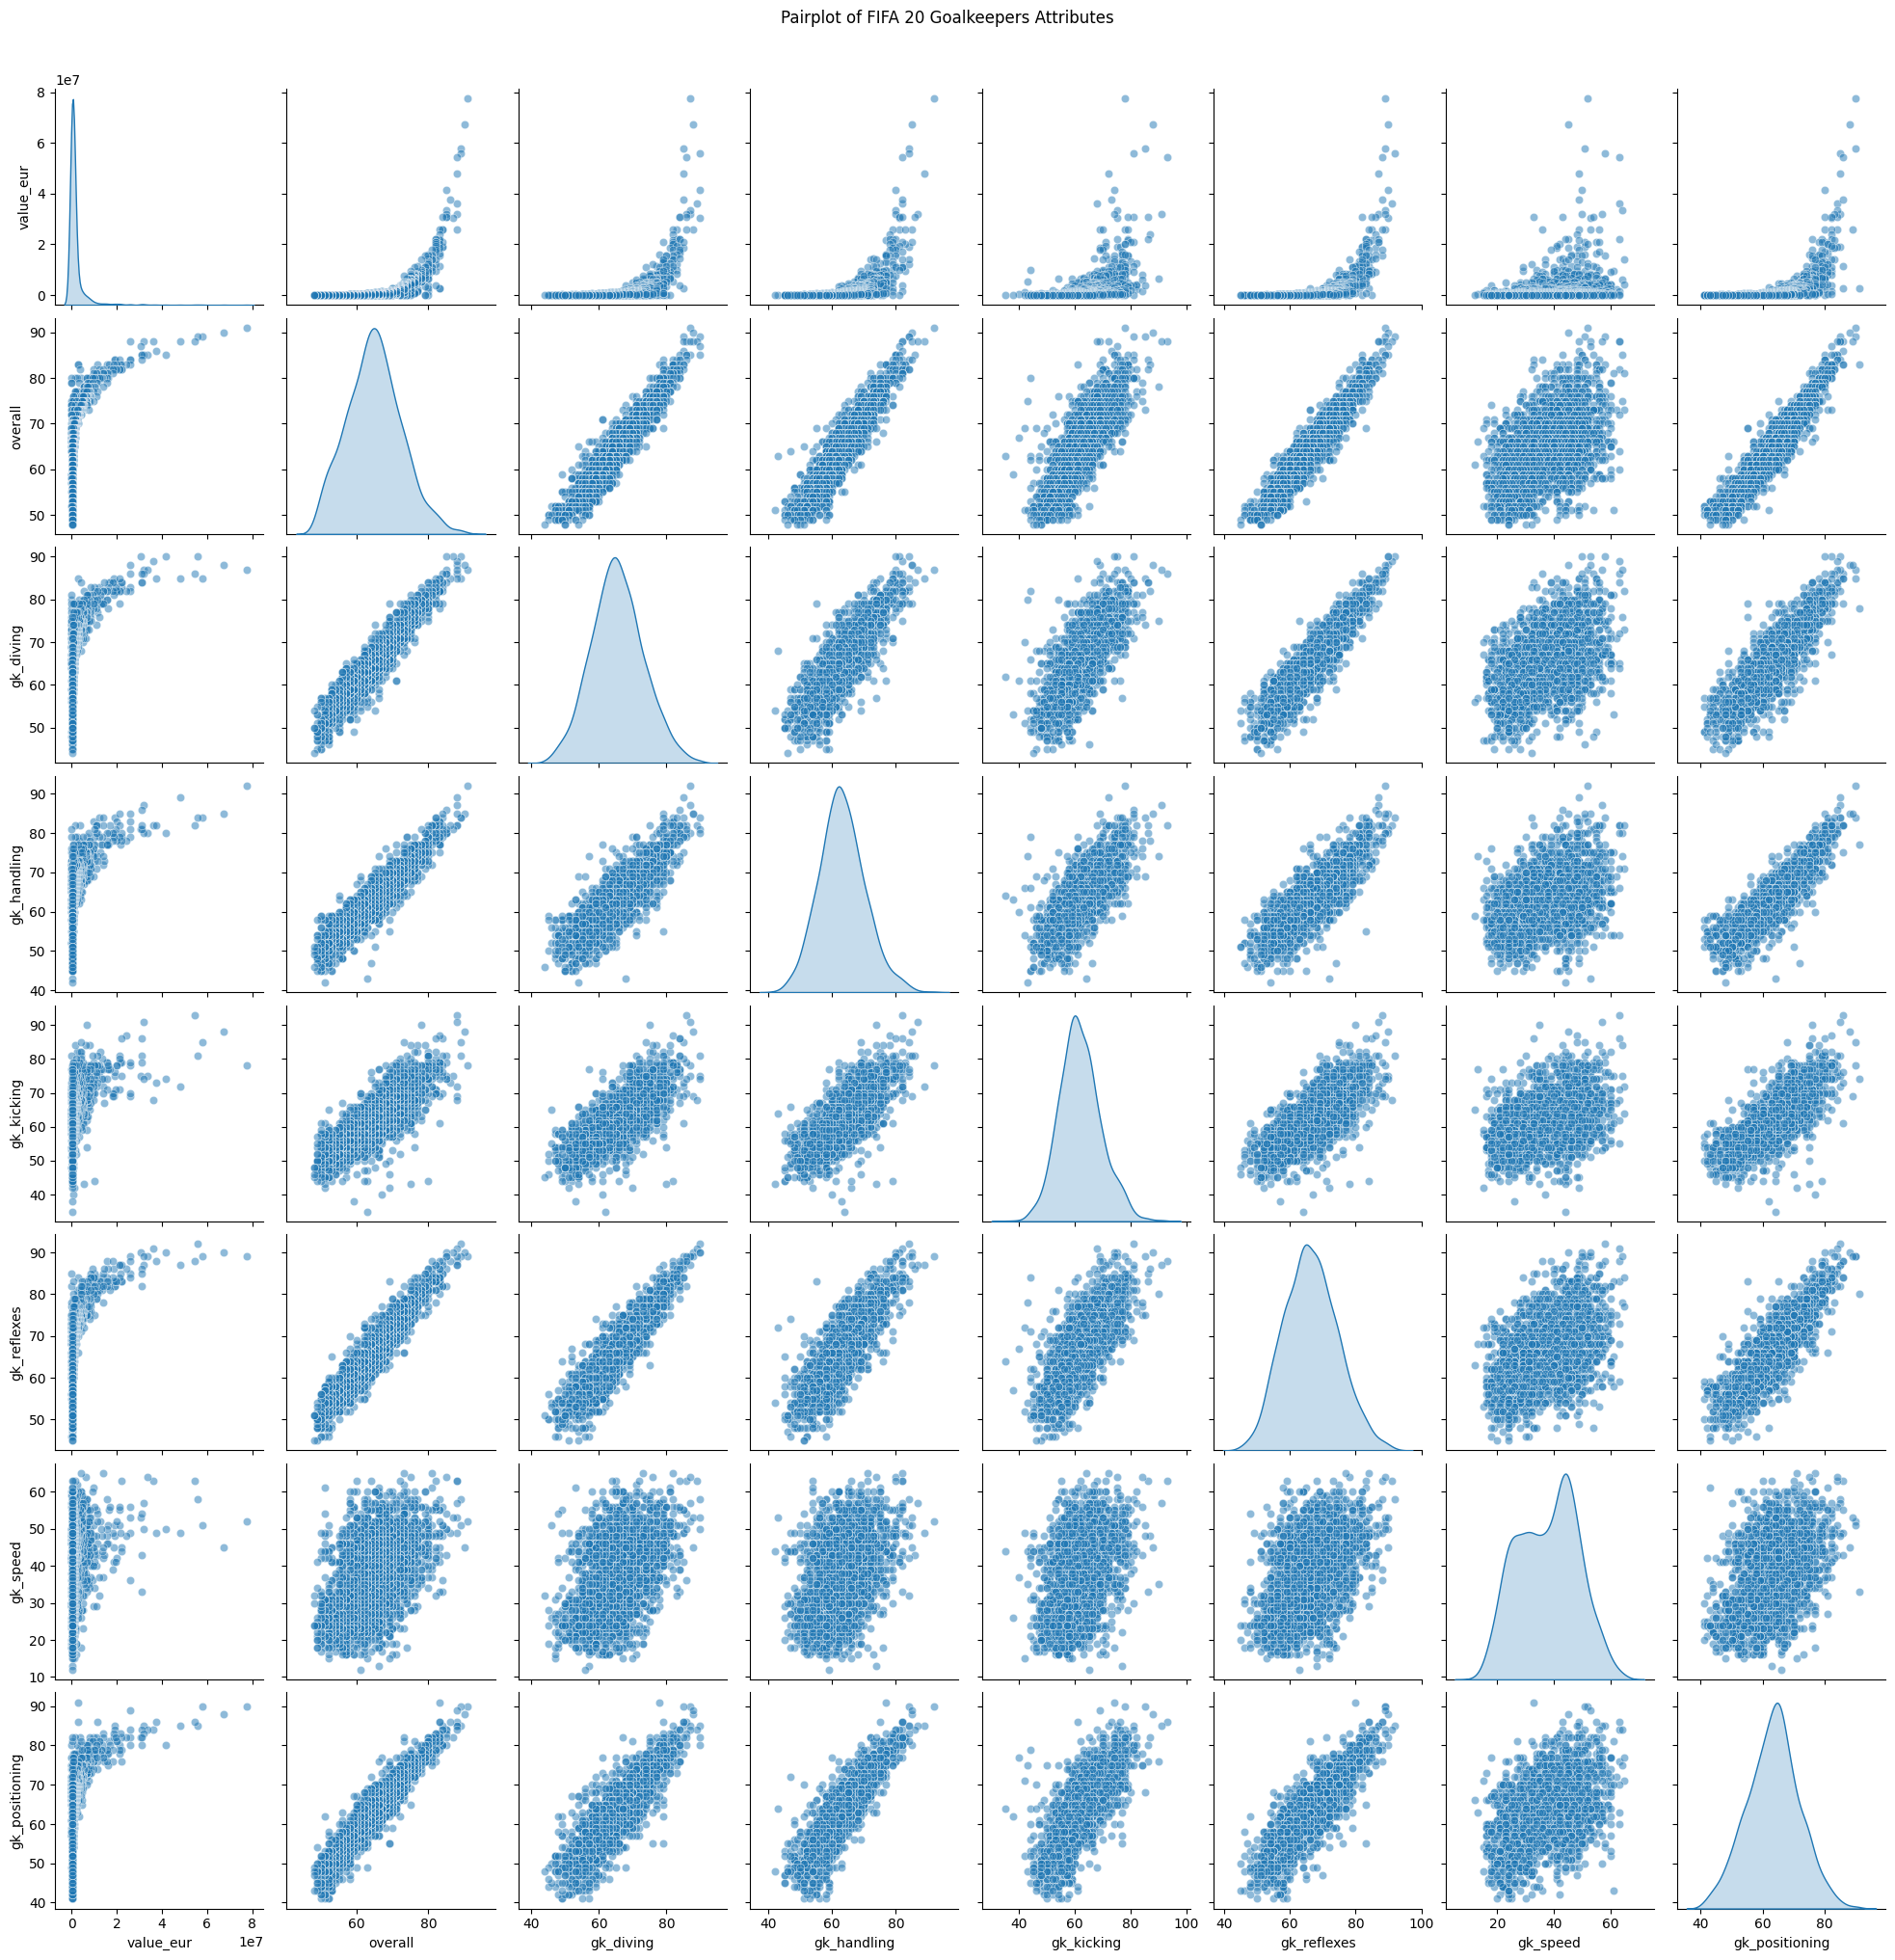

In [46]:
#Pairplot of goalies
numeric_cols = goalies_df.select_dtypes(include=[np.number]).columns.tolist()
# Plotting the pairplot for goalkeepers
sns.pairplot(goalies_df[numeric_cols], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of FIFA 20 Goalkeepers Attributes', y=1.02)
plt.show()

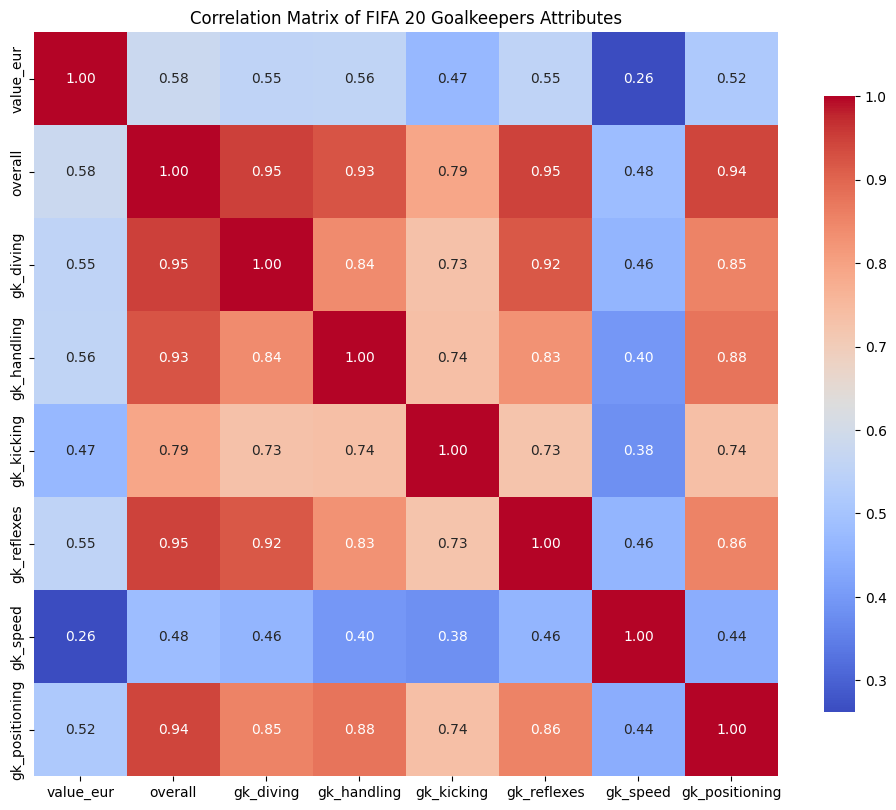

In [47]:
#Correlation matrix and visualization for goalkeepers
corr_goalies = goalies_df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_goalies, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of FIFA 20 Goalkeepers Attributes')
plt.show()

In [48]:
#Creating the nationality groups for goalkeepers
goalies_df['nationality_group'] = goalies_df['nationality'].apply(lambda x:
                                                'Argentina' if x == 'Argentina' else
                                                'England' if x == 'England' else
                                                'Brasil' if x == 'Brazil' else
                                                'France' if x == 'France' else
                                                'Spain' if x == 'Spain' else
                                                'Portugal' if x == 'Portugal' else
                                                'Other')
goalies_df.head(10)

short_name  value_eur  overall player_positions  gk_diving  gk_handling  \
0       J. Oblak   77500000       91               GK   87.00000     92.00000   
1  M. ter Stegen   67500000       90               GK   88.00000     85.00000   
2        Alisson   58000000       89               GK   85.00000     84.00000   
3         De Gea   56000000       89               GK   90.00000     84.00000   
4        Ederson   54500000       88               GK   86.00000     82.00000   
5    T. Courtois   48000000       88               GK   85.00000     89.00000   
6  S. Handanovič   26000000       88               GK   88.00000     85.00000   
7       M. Neuer   32000000       88               GK   87.00000     87.00000   
8      H. Lloris   36000000       88               GK   89.00000     82.00000   
9       K. Navas   30500000       87               GK   90.00000     81.00000   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning nationality  \
0    78.00000     89.00000  52.00000        90.00000    Slovenia   
1    88.00000     90.00000  45.00000        88.00000     Germany   
2    85.00000     89.00000  51.00000        90.00000      Brazil   
3    81.00000     92.00000  58.00000        85.00000       Spain   
4    93.00000     88.00000  63.00000        86.00000      Brazil   
5    72.00000     87.00000  49.00000        85.00000     Belgium   
6    69.00000     89.00000  53.00000        89.00000    Slovenia   
7    91.00000     87.00000  57.00000        85.00000     Germany   
8    68.00000     91.00000  63.00000        84.00000      France   
9    75.00000     90.00000  53.00000        82.00000  Costa Rica   

  nationality_group  
0             Other  
1             Other  
2            Brasil  
3             Spain  
4            Brasil  
5             Other  
6             Other  
7             Other  
8            France  
9             Other

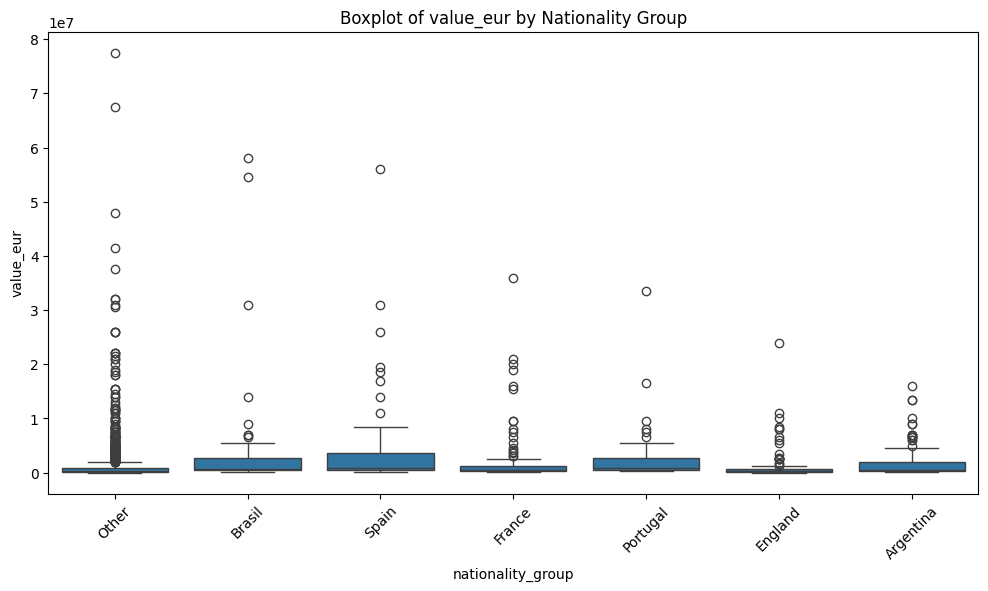

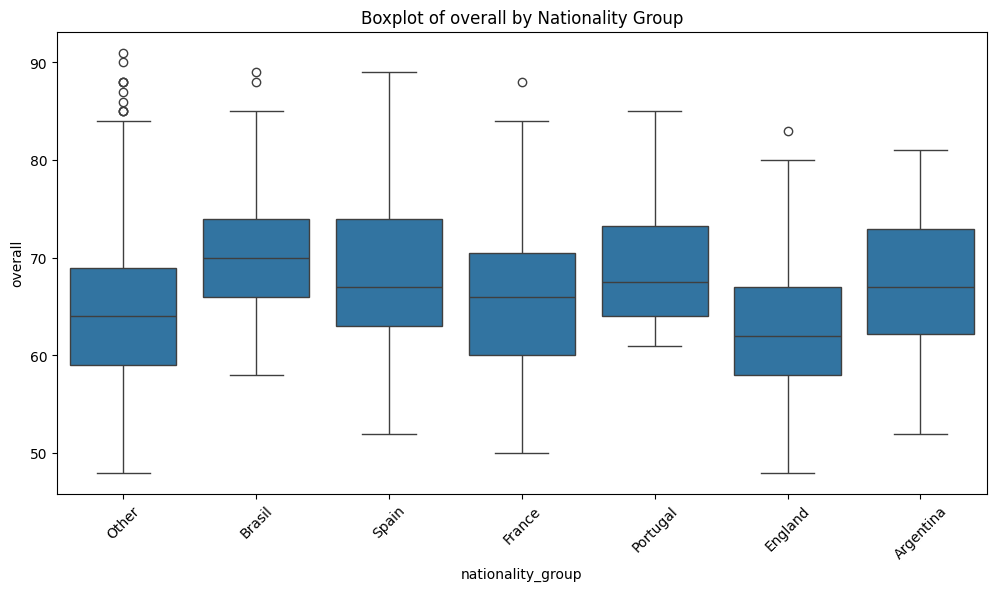

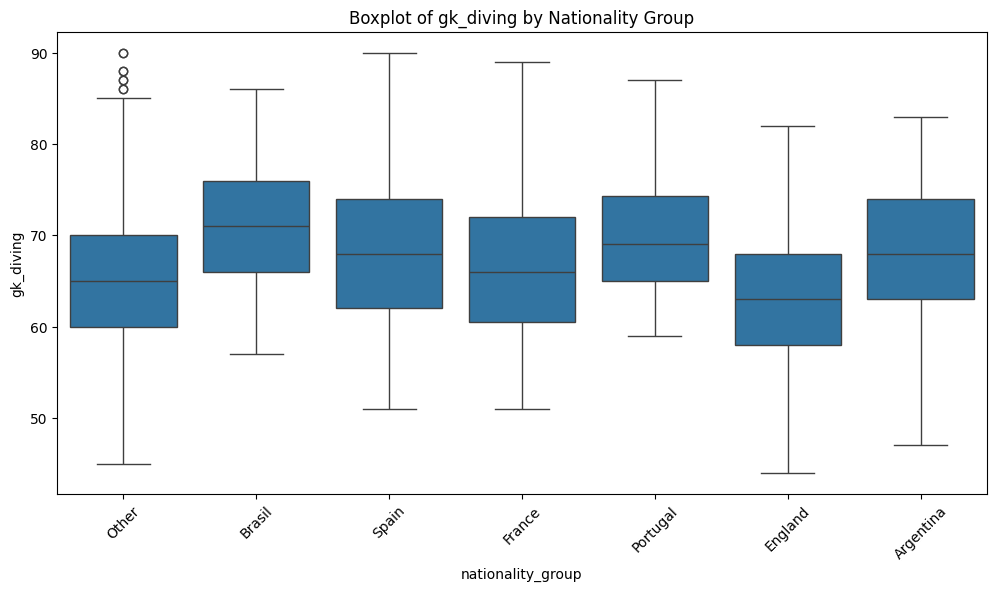

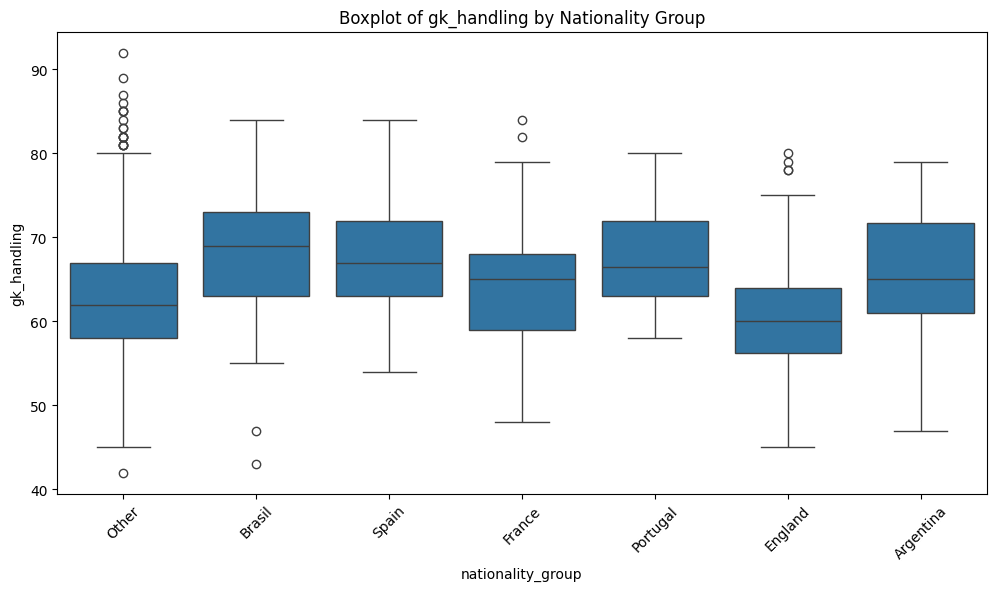

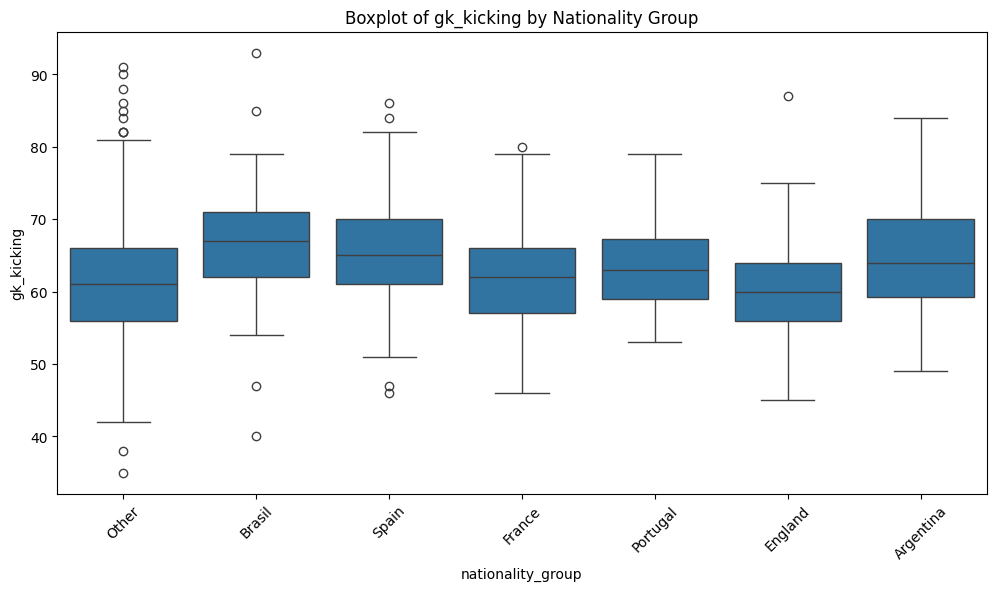

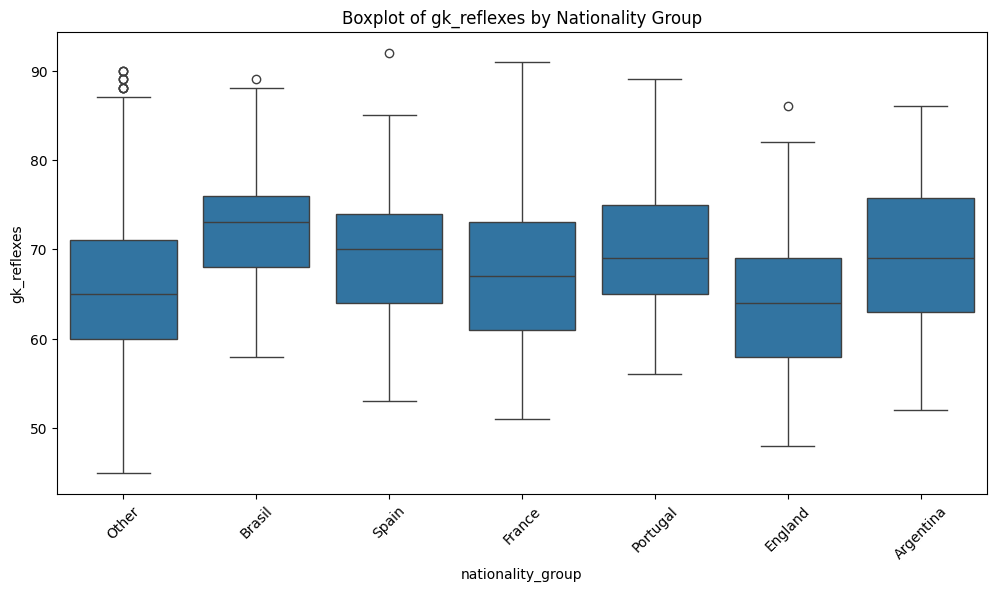

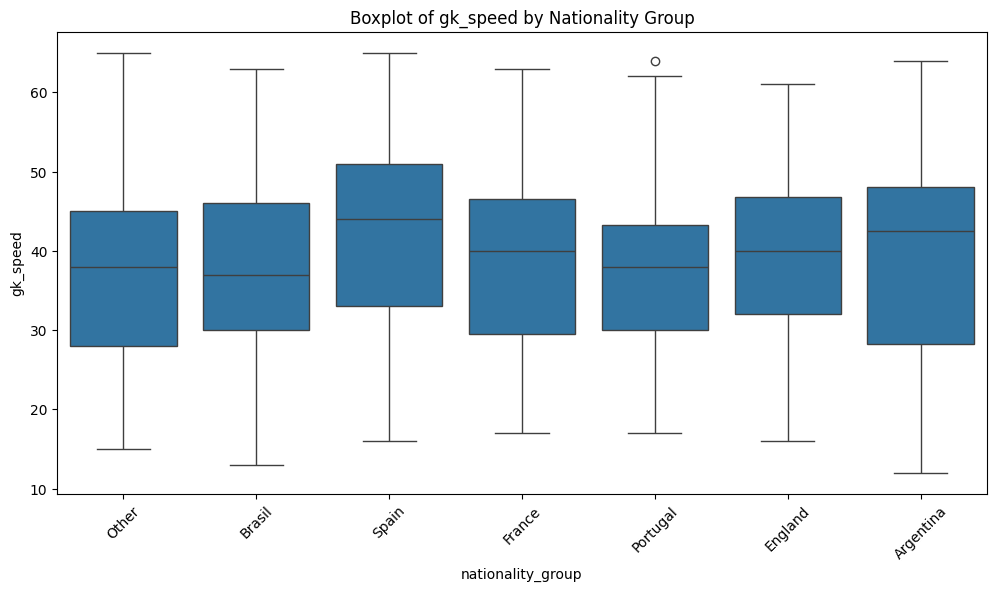

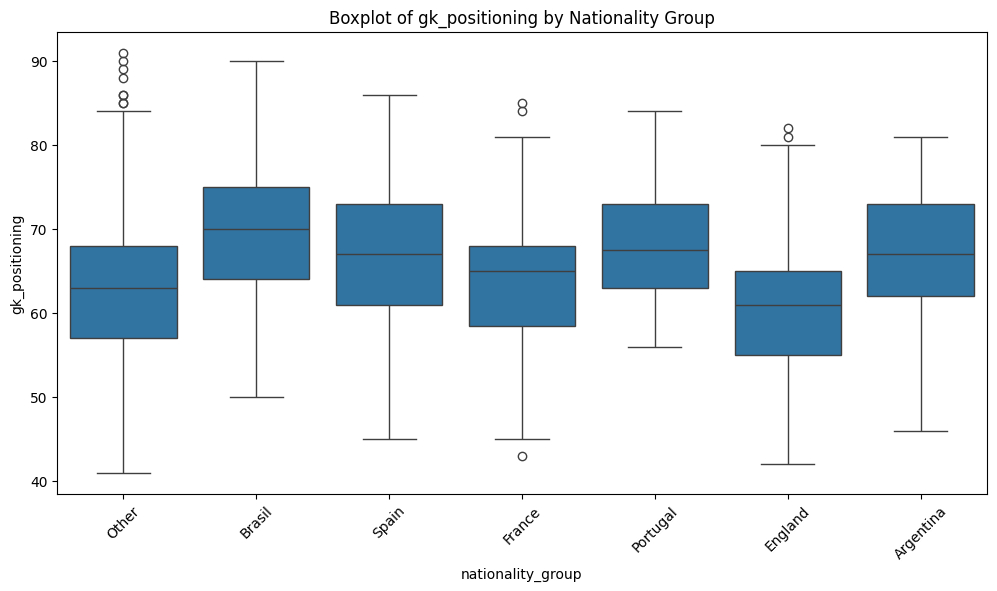

In [49]:
#Creating boxplots for each nationality group in the goalkeepers dataset
for var in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='nationality_group', y=f'{var}', data=goalies_df)
    plt.title(f'Boxplot of {var} by Nationality Group')
    plt.xticks(rotation=45)
    plt.show()

## Conclusion

For the players, our independent variable (value_eur), is not so correlated with the variables aside of the overall rating. The fact that overall rating is the most correlated makes sense because other stats like passing or defending may include a lot of variance. Furthermore, the overall rating is, justifiably so, correlated more with the technical habilities like passing and dribbling. However, it is not very related with pace and with defending, suggesting that these traits don't influence that much on the rating. With defennding, it only suggests the fact that attackers are more valuable than defenders. Last but not least, the three most correlated variables between themselves are passing, shooting, and dribbling. This suggests that, overall, the most skilled players with the ball, with an attacking mindset, develop these three skills as good as the next one.
We also sustain the hypothesis that nationality maatters on the pricing of players. Wit the boxplot plots by nationality group for each metric showed us that overall, the distribution of metrics for each group is similar. The differences in median and overall distributions for the same metric are not significantly different, except for the 'Others' groups in some cases. Immportant differences only showcase in the overall rating metric, having the 'Others' and 'England' groups with lower overall ratings. Regarding the player's value, it is understandable that the 'Others' group apparently has more outliers because it englobes many nationalities. However, it becomes evident that the majority of the higher values by nationality are those from the 'Big 6' we classified. This statement is sustained for English players too because the only second division league in the game is the English one called The Championship. Thus, it explains the elevated number of higher 'outliers' for English players (with those outliers not being outliers but actual points of their distribution). 

On the other hand, we have the goalkeepers dataset. For this position, the player's value is not very correlated with the other variables. This comes as a surprise because the overall hyptothesis is that the player's value is to be defined by their skills ratings and their nationality. 
With goalkeepers, the overall rating is more correlated with the other skills than with the players. This showcases that those skills are more definitive on the rating and have less variance. This variance is induced by the positions of the players. Furthermore, the skills are more related to each other, suggesting that the better goalkeepers are better overall in every skill. This may suggest that for the goalkeeper's analysis, the overall rating should suffice as the only independent variable for the analysis. 
The nationality analysis for goalkeepers suggests that the 'Others' groups overall does showcase lesser values for each metric. However, the outliers may be really outliers because you have some of the greates goalkeepers not having the nationality of the one of the 'Big 6' like Jan Oblak (Slovenian), Thibaut Cortois (Belgiam), or Manuel Neuer (German). The outliers in this group make the case of being the best goalkeepers of the game. 